**Discription**

The objective this Haberman's data set to predict whether patient has 5+ yaers survived or not.

- Number of Instances : 306
- Number of Attributes: 4 (inculiding the class attribute)
- Attribute Information:
   - Age of patient at time of operation(numerical)
   - Patient's year of operation (year - 1900,numerical)
   - Number of positive axillary nodes delecied (numerical)
   - Survival status (class attribute)
    - 1. the patient survived 5 years of longer
    - 2. the patient died within 5 years
  - Missing Attribute Value : None


<h2>Haberman Dataset EDA</h2>

**High Level Statistics**

**Step 1: Import libraries like Numpy, Padas, Matplotlib & Seaborn**

In [ ]:
# Numpy 
import numpy as np

# Pandas
import pandas as pd

# Matplotlib
import matplotlib.pyplot as plt

# Seaborn
import seaborn as sns

# import classification report
from sklearn.metrics import classification_report

import warnings
warnings.filterwarnings('ignore')

**Step 2: Load Dataset**

In [ ]:
# Load dataset

column_name = ['Age','Operation_Year','Axil_Nodes','Surv_Status']
df = pd.read_csv('/content/drive/MyDrive/ML_DataFile/haberman.csv',names=column_name)
df.head()

,Age,Operation_Year,Axil_Nodes,Surv_Status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


## **Step 3: Exploratory Data Analysis**

In [ ]:
#get familier with dataset, display the top 5 data records
df.head()  

,Age,Operation_Year,Axil_Nodes,Surv_Status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [ ]:
# get familier with dataset, display the last 5 data records
df.tail() 

,Age,Operation_Year,Axil_Nodes,Surv_Status
301,75,62,1,1
302,76,67,0,1
303,77,65,3,1
304,78,65,1,2
305,83,58,2,2


In [ ]:
# get familier with dataset, display randomly 5 data records
df.sample(5) 

,Age,Operation_Year,Axil_Nodes,Surv_Status
261,65,66,15,2
63,43,59,2,2
46,41,58,0,1
110,48,61,8,1
69,43,60,0,1


In [ ]:
# getting to know about rows and columns we're dealing with - 768 rows , 9 columns
df.shape 

(306, 4)

In [ ]:
# learning about the columns
df.columns 

Index(['Age', 'Operation_Year', 'Axil_Nodes', 'Surv_Status'], dtype='object')

In [ ]:
# knowledge of data type helps for computation
df.dtypes

Age               int64
Operation_Year    int64
Axil_Nodes        int64
Surv_Status       int64
dtype: object

In [ ]:
#  Print a concise summary of a DataFrame. 
#  This method prints information about a DataFrame including the index dtype and columns,
#  non-null values and memory usage

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Age             306 non-null    int64
 1   Operation_Year  306 non-null    int64
 2   Axil_Nodes      306 non-null    int64
 3   Surv_Status     306 non-null    int64
dtypes: int64(4)
memory usage: 9.7 KB


In [ ]:
 #helps us to understand how data has been spread across the table.
# count :- the number of NoN-empty rows in a feature.
# mean :- mean value of that feature.
# std :- Standard Deviation Value of that feature.
# min :- minimum value of that feature.
# max :- maximum value of that feature.
# 25%, 50%, and 75% are the percentile/quartile of each features.

df.describe()

,Age,Operation_Year,Axil_Nodes,Surv_Status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


Summary of Dataset :

The described method will help to see how data has been spread of numerical values. We can clearly see the minimum value, mean values, different percentile values, and maximum values.

In [ ]:
df['Surv_Status'].value_counts()

1    225
2     81
Name: Surv_Status, dtype: int64

**PDF**

## **Data Visulization**

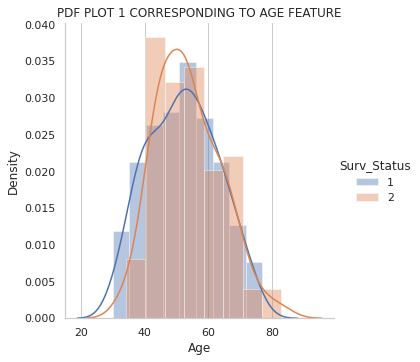

In [ ]:
# Age
sns.FacetGrid(df,hue='Surv_Status', height=5).map(sns.distplot,'Age').add_legend()
plt.title('PDF PLOT 1 CORRESPONDING TO AGE FEATURE')
plt.grid(axis='y')
plt.show()

**Conclusion**
- This histogram is overlapping each other.
- It is seen that people within the range of 40-60 are more likely to die.
- People less than age 40 are more likely to survive.

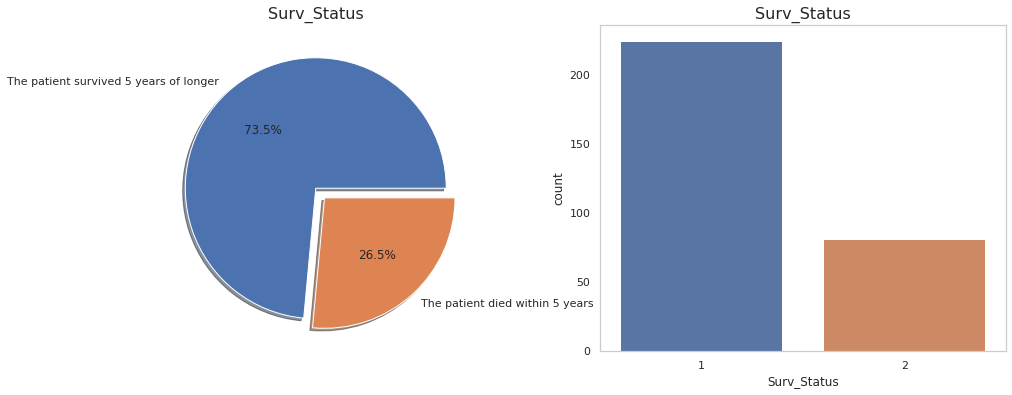

In [ ]:
# Stroke rate Count Plot

f,ax=plt.subplots(1,2,figsize=(16,6))

mylabels = ['The patient survived 5 years of longer','The patient died within 5 years']
df['Surv_Status'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],labels=mylabels ,shadow=True)
ax[0].set_title('Surv_Status',size=16)
ax[0].set_ylabel('')

sns.countplot('Surv_Status',data=df,ax=ax[1])
ax[1].set_title('Surv_Status',size=16)

N,P=df['Surv_Status'].value_counts()
plt.grid(axis='y')
plt.show()

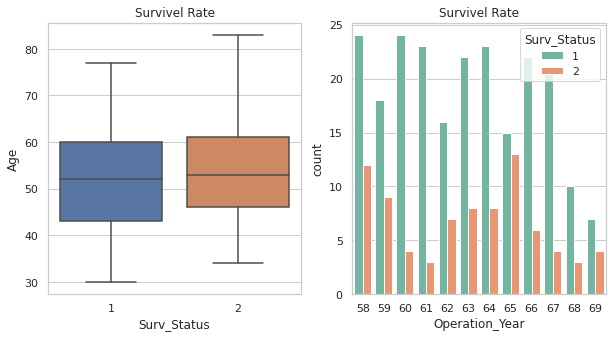

In [ ]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.boxplot(x="Surv_Status", y="Age", data=df)

plt.title('Survivel Rate')

plt.subplot(1,2,2)
sns.countplot("Operation_Year", data=df,hue='Surv_Status',palette="Set2")
plt.title('Survivel Rate')
sns.set_theme(style='darkgrid')
plt.show()

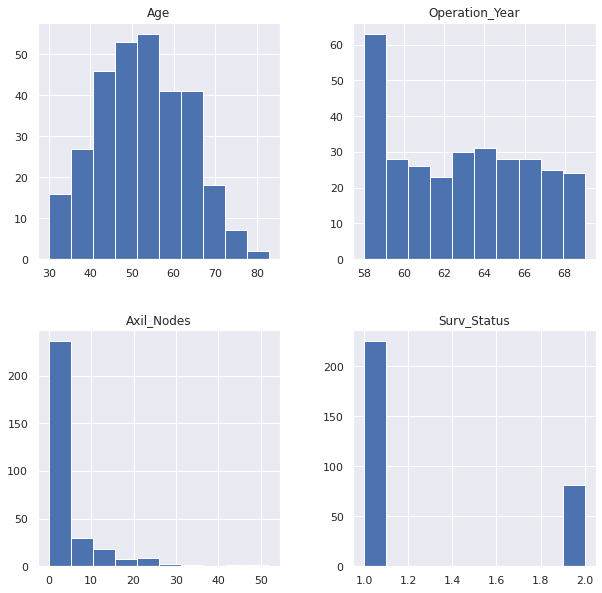

In [ ]:
# Histogram of each feature
df.hist(bins=10,figsize=(10,10))
plt.show()

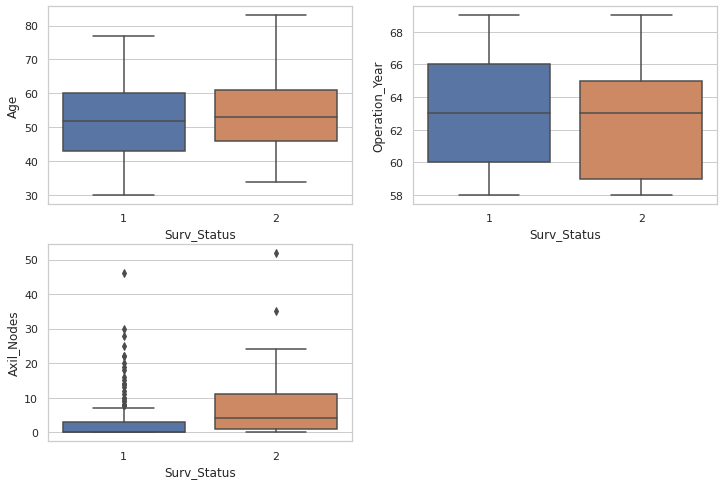

In [ ]:
plt.figure(figsize=(12,8))
sns.set_style(style='whitegrid')
plt.subplot(2,2,1)
sns.boxplot(x='Surv_Status',y ='Age',data=df)
plt.subplot(2,2,2)
sns.boxplot(x='Surv_Status',y='Operation_Year',data=df)
plt.subplot(2,2,3)
sns.boxplot(x='Surv_Status',y='Axil_Nodes',data=df)

plt.show()

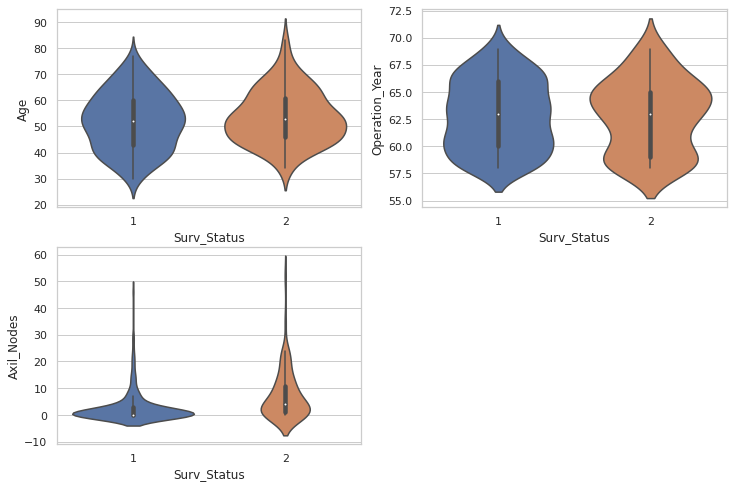

In [ ]:
plt.figure(figsize=(12,8))
sns.set_style(style='whitegrid')

plt.subplot(2,2,1)
sns.violinplot(x='Surv_Status',y ='Age',data=df)
plt.subplot(2,2,2)
sns.violinplot(x='Surv_Status',y='Operation_Year',data=df)
plt.subplot(2,2,3)
sns.violinplot(x='Surv_Status',y='Axil_Nodes',data=df)

plt.show()

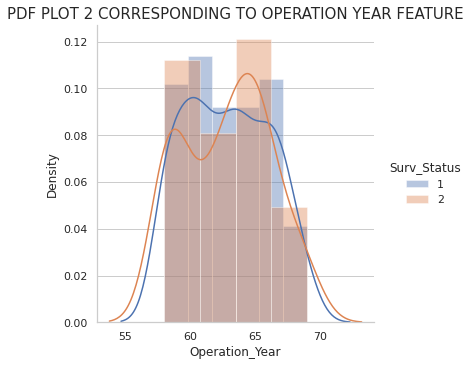

In [ ]:
# Operaint_Year

sns.FacetGrid(df,hue='Surv_Status', height=5).map(sns.distplot,'Operation_Year').add_legend()
plt.title('PDF PLOT 2 CORRESPONDING TO OPERATION YEAR FEATURE',size=15)
plt.grid(axis='x')
plt.show()

**Conclusion**
- The plot represents the immense overlapping of respective two classes
- It is clearly seen that the patients whose operation was done in between 60 to 65 died.

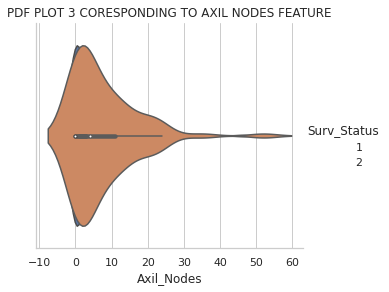

In [ ]:
# Axil_nodes

sns.FacetGrid(df,hue='Surv_Status',size=4).map(sns.violinplot,'Axil_Nodes').add_legend()
plt.title('PDF PLOT 3 CORESPONDING TO AXIL NODES FEATURE')
plt.show()

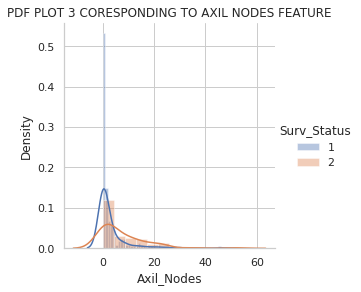

In [ ]:
sns.FacetGrid(df,hue='Surv_Status',size=4).map(sns.distplot,'Axil_Nodes').add_legend()
plt.title('PDF PLOT 3 CORESPONDING TO AXIL NODES FEATURE')
plt.show()

In [ ]:
import plotly.express as px

fig = px.scatter_3d(df, x='Age',y='Operation_Year',z='Axil_Nodes',color='Surv_Status')
fig.show()

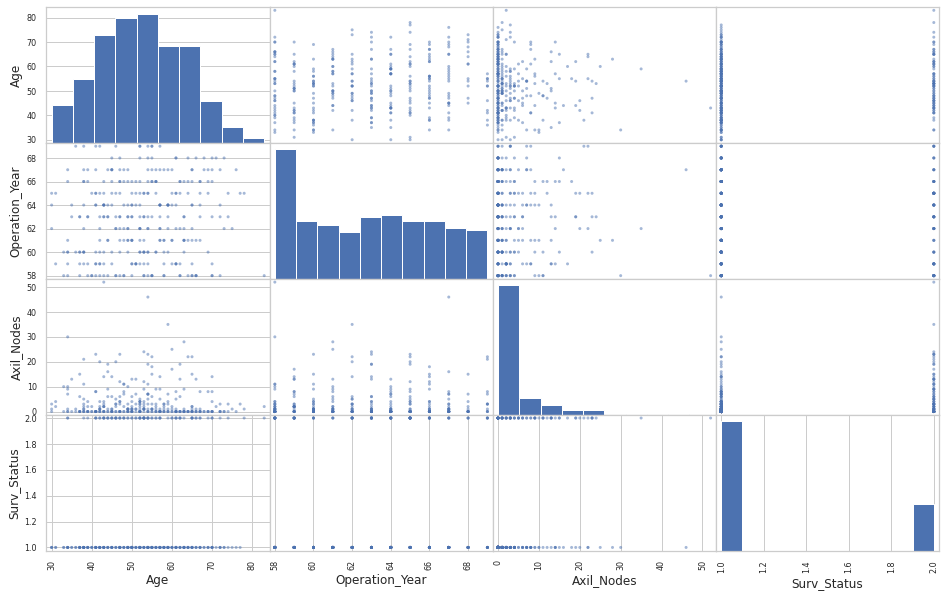

In [ ]:
# Scatter Plot matrix
from pandas.plotting import scatter_matrix
scatter_matrix(df,figsize=(16,10));

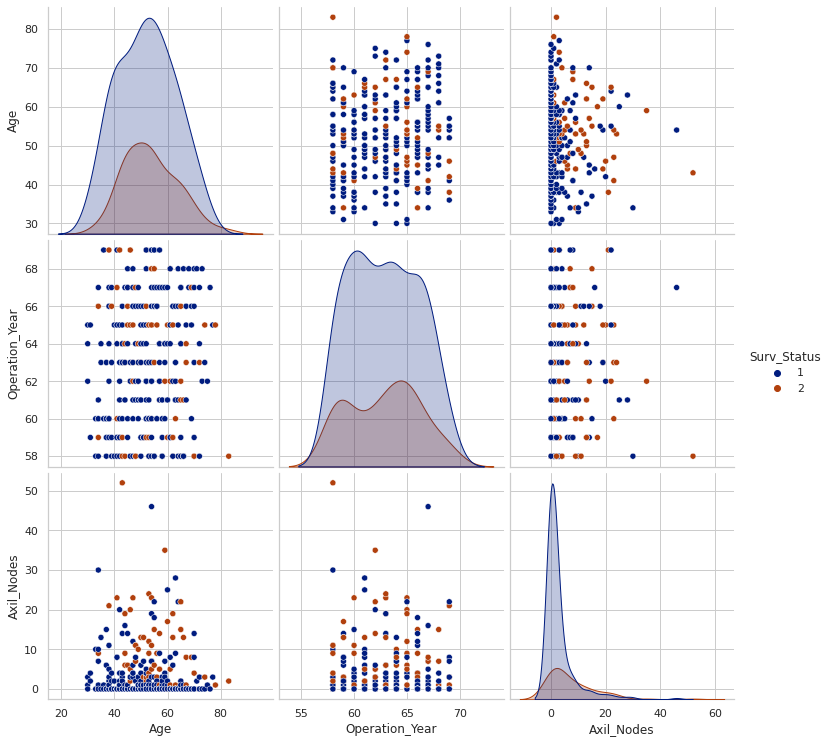

In [ ]:
sns.pairplot(df,height=3.5,hue='Surv_Status',palette='dark')

plt.show()

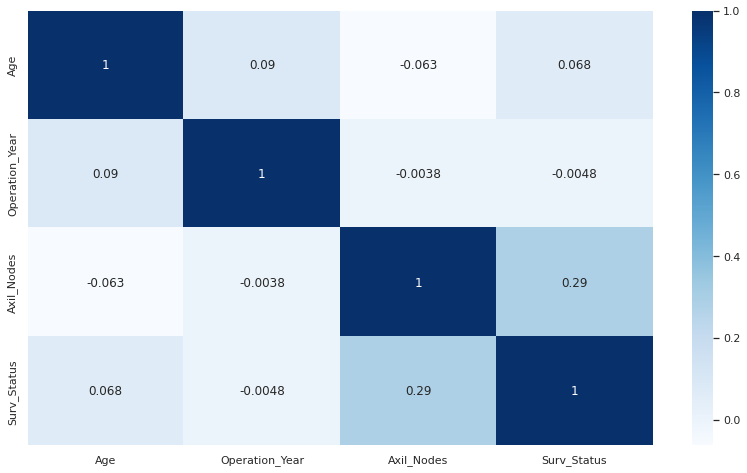

In [ ]:
corrmat=df.corr()
plt.figure(figsize=(14,8))
sns.heatmap(corrmat,cmap='Blues', annot=True)
plt.show()

**Observations:**

- From the correlation heatmap, we can see that there is a high correlation between Outcome and [Age, Operation_Year, Axil_Nodes,Surv_Status]. We can select these features to accept input from the user and predict the Surv_Status.

## **Split the data frame into X & y** 

In [ ]:
target_name = 'Surv_Status'

# Separate object for target feature
y = df[target_name]

# Separate object for input Feature
X = df.drop(target_name,axis=1)

In [ ]:
X.head()

,Age,Operation_Year,Axil_Nodes
0,30,64,1
1,30,62,3
2,30,65,0
3,31,59,2
4,31,65,4


In [ ]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Surv_Status, dtype: int64

## **Apply Feature Scaling**

In [ ]:
# Apply Standard Scaler

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X)
SSX = scaler.transform(X)

Inplace of Standard Scaler you have to try other data scaling techniques like normalizier,minmax scaler and binarizer.

## **TRAIN DATA TEST DATA SPLIT**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df,y,test_size=0.2)

In [ ]:
# train data shape
X_train.shape,y_train.shape

((244, 4), (244,))

In [ ]:
# Test data shape
X_test.shape,y_test.shape

((62, 4), (62,))

In [ ]:
X_train

,Age,Operation_Year,Axil_Nodes,Surv_Status
182,55,58,1,1
158,53,59,3,2
251,63,61,9,1
87,45,68,0,1
209,58,60,3,1
...,...,...,...,...
219,59,64,4,1
212,58,58,0,1
228,60,64,0,1
220,59,64,0,1


In [ ]:
y_train

182    1
158    2
251    1
87     1
209    1
      ..
219    1
212    1
228    1
220    1
25     1
Name: Surv_Status, Length: 244, dtype: int64

In [ ]:
# import accourcy test library
from sklearn.metrics import accuracy_score

In [ ]:
# import confusion_matrix
from sklearn.metrics import confusion_matrix

## **kNeighborsClassifier(KNN) using grid search cv**

In [ ]:
# import sklearn KNeighborsClassifier(KNN) and grid search cv
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [ ]:
knn = KNeighborsClassifier()
k_range = list(range(1, 31))
param_grid = dict(n_neighbors=k_range)

# defining parameter range
grid = GridSearchCV(knn, param_grid, cv=15, scoring='accuracy', return_train_score=False,verbose=1)

# fitting the model for grid search
grid_search=grid.fit(X_train, y_train)

Fitting 15 folds for each of 30 candidates, totalling 450 fits


In [ ]:
print("best_estimator result :-",grid_search.best_estimator_)
print("best_params result :-",grid_search.best_params_)

best_estimator result :- KNeighborsClassifier(n_neighbors=24)
best_params result :- {'n_neighbors': 24}


In [ ]:
knn = KNeighborsClassifier(n_neighbors=13)
knn.fit(X_train,y_train)


y_pred_train = knn.predict(X_train)
accuracy_1 = accuracy_score(y_train,y_pred_train)
print('Accuracy for train data :',accuracy_1)

y_pred_test = knn.predict(X_test)
accuracy_1 = accuracy_score(y_test,y_pred_test)
print('Accuracy for test data :',accuracy_1)


Accuracy for train data : 0.7991803278688525
Accuracy for test data : 0.6935483870967742


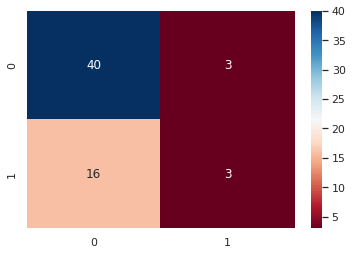

In [ ]:


c_matrix_1 = confusion_matrix(y_test,y_pred_test)
c_matrix_1

#Utilizing the heatmap function we have presented the confusion matrix.
sns.heatmap(c_matrix_1 , cmap='RdBu',annot=True)
plt.show()

In [ ]:
target_names = ['Present survived 5+ year','Present dead within 5 year']
print(classification_report(y_test, y_pred_test, target_names=target_names))

                            precision    recall  f1-score   support

  Present survived 5+ year       0.71      0.93      0.81        43
Present dead within 5 year       0.50      0.16      0.24        19

                  accuracy                           0.69        62
                 macro avg       0.61      0.54      0.52        62
              weighted avg       0.65      0.69      0.63        62



## Navie-Bayes Algorithm

In [ ]:
# import sklearn naive_bayes 
from sklearn.naive_bayes import GaussianNB

In [ ]:
gnb = GaussianNB(var_smoothing=1)
y_pred = gnb.fit(X_train,y_train).predict(X_test)

y_pred_train = gnb.predict(X_train)
accuracy_2 = accuracy_score(y_train,y_pred_train)
print('Accuracy for train data Result :',accuracy_2)

y_pred_test = gnb.predict(X_test)
accuracy_2 = accuracy_score(y_test,y_pred_test)
print('Accuracy for test data Result :',accuracy_2)


Accuracy for train data Result : 0.75
Accuracy for test data Result : 0.6935483870967742


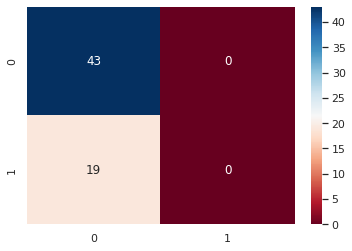

In [ ]:


c_matrix_1 = confusion_matrix(y_test,y_pred_test)
c_matrix_1

#Utilizing the heatmap function we have presented the confusion matrix.
sns.heatmap(c_matrix_1 , cmap='RdBu',annot=True)
plt.show()

In [ ]:
target_names = ['Present survived 5+ year','Present dead within 5 year']
print(classification_report(y_test, y_pred_test, target_names=target_names))

                            precision    recall  f1-score   support

  Present survived 5+ year       0.69      1.00      0.82        43
Present dead within 5 year       0.00      0.00      0.00        19

                  accuracy                           0.69        62
                 macro avg       0.35      0.50      0.41        62
              weighted avg       0.48      0.69      0.57        62



## **Logistic-Regression Algroithm using grid search cv**

In [ ]:
# import Logistic-Regrassion and grid search cv
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [ ]:
grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}   # l1 lasso l2 ridge
logreg = LogisticRegression()

# defining parameter range
logreg_cv = GridSearchCV(logreg,grid,cv=10)

# fitting the model for grid search
grid_search_log=logreg_cv.fit(X_train, y_train)

In [ ]:
print("best_estimator result :-",grid_search_log.best_estimator_)
print("best_params result :-",grid_search_log.best_params_)

best_estimator result :- LogisticRegression()
best_params result :- {'C': 1.0, 'penalty': 'l2'}


In [ ]:
logistic = LogisticRegression(C=10.0,penalty="l2")
y_pred = logistic.fit(X_train,y_train)


y_pred_train = logistic.predict(X_train)
accuracy_3 = accuracy_score(y_train,y_pred_train)
print('Accuracy for train data Result :',accuracy_3)

y_pred_test = logistic.predict(X_test)
accuracy_3 = accuracy_score(y_test,y_pred_test)
print('Accuracy for test data Result :',accuracy_3)

Accuracy for train data Result : 1.0
Accuracy for test data Result : 1.0


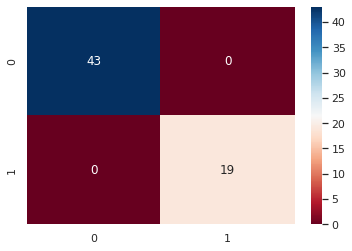

In [ ]:

c_matrix_1 = confusion_matrix(y_test,y_pred_test)
c_matrix_1

#Utilizing the heatmap function we have presented the confusion matrix.
sns.heatmap(c_matrix_1 , cmap='RdBu',annot=True)
plt.show()

In [ ]:
target_names = ['Present survived 5+ year','Present dead within 5 year']
print(classification_report(y_test, y_pred_test, target_names=target_names))

                            precision    recall  f1-score   support

  Present survived 5+ year       1.00      1.00      1.00        43
Present dead within 5 year       1.00      1.00      1.00        19

                  accuracy                           1.00        62
                 macro avg       1.00      1.00      1.00        62
              weighted avg       1.00      1.00      1.00        62



## **Decision Tree Algrithm using grid search cv**

In [ ]:
# import sklearn Decision Tree
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid = {'max_features': ['auto', 'sqrt', 'log2'],
              'ccp_alpha': [0.1, .01, .001],
              'max_depth' : [5, 6, 7, 8, 9],
              'criterion' :['gini', 'entropy']
             }
tree_clas = DecisionTreeClassifier(random_state=1024)
grid_search = GridSearchCV(estimator=tree_clas, param_grid=param_grid, cv=5, verbose=True)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 90 candidates, totalling 450 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=1024),
             param_grid={'ccp_alpha': [0.1, 0.01, 0.001],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 6, 7, 8, 9],
                         'max_features': ['auto', 'sqrt', 'log2']},
             verbose=True)

In [ ]:
grid_search.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.1, max_depth=5, max_features='auto',
                       random_state=1024)

In [ ]:
dici_class = DecisionTreeClassifier(max_depth=3,random_state=1024,max_features='auto',ccp_alpha=0.01,criterion='entropy')
y_pred = dici_class.fit(X_train,y_train)

y_pred_train = dici_class.predict(X_train)
accuracy = accuracy_score(y_train,y_pred_train)
print('Accuracy for train data Result :',accuracy)

y_pred_test = dici_class.predict(X_test)
accuracy_4 = accuracy_score(y_test,y_pred_test)
print('Accuracy for test data Result :',accuracy_4)


Accuracy for train data Result : 1.0
Accuracy for test data Result : 1.0


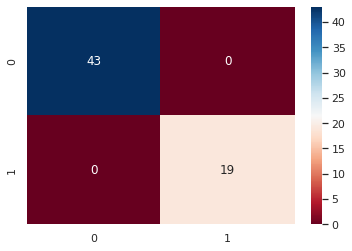

In [ ]:

c_matrix_1 = confusion_matrix(y_test,y_pred_test)
c_matrix_1

#Utilizing the heatmap function we have presented the confusion matrix.
sns.heatmap(c_matrix_1 , cmap='RdBu',annot=True)
plt.show()

In [ ]:
target_names = ['Present survived 5+ year','Present dead within 5 year']
print(classification_report(y_test, y_pred_test, target_names=target_names))

                            precision    recall  f1-score   support

  Present survived 5+ year       1.00      1.00      1.00        43
Present dead within 5 year       1.00      1.00      1.00        19

                  accuracy                           1.00        62
                 macro avg       1.00      1.00      1.00        62
              weighted avg       1.00      1.00      1.00        62



## **Random Forest Machine Learning Algorithm**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
random = RandomForestClassifier(n_estimators= 8)
y_pred = random.fit(X_train, y_train).predict(X_test)

y_pred_train = random.predict(X_train)
accuracy = accuracy_score(y_train,y_pred_train)
print('Accuracy for train data :',accuracy)

y_pred_test = random.predict(X_test)
accuracy_5 = accuracy_score(y_test,y_pred_test)
print('Accuracy for test data :',accuracy_5)

Accuracy for train data : 1.0
Accuracy for test data : 1.0


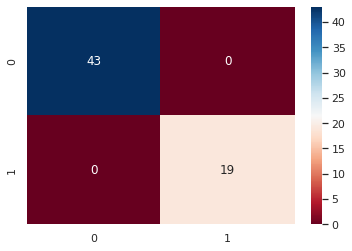

In [ ]:

c_matrix_1 = confusion_matrix(y_test,y_pred_test)
c_matrix_1
#Utilizing the heatmap function we have presented the confusion matrix.
sns.heatmap(c_matrix_1 , cmap='RdBu',annot=True)
plt.show()

In [ ]:
target_names = ['Present survived 5+ year','Present dead within 5 year']
print(classification_report(y_test, y_pred_test, target_names=target_names))

                            precision    recall  f1-score   support

  Present survived 5+ year       1.00      1.00      1.00        43
Present dead within 5 year       1.00      1.00      1.00        19

                  accuracy                           1.00        62
                 macro avg       1.00      1.00      1.00        62
              weighted avg       1.00      1.00      1.00        62



# **Support vector machine Algorithm (SVM)**

In [ ]:
# import svm algorithm
from sklearn import svm

In [ ]:
clf = svm.SVC(kernel='poly',degree=1)

y_pred = clf.fit(X_train,y_train).predict(X_test)

In [ ]:
y_pred_train = clf.predict(X_train)
accuracy = accuracy_score(y_train,y_pred_train)
print('Accuracy for train data : ',accuracy)

y_pred_test = clf.predict(X_test)
accuracy_6 = accuracy_score(y_test,y_pred_test)
print('Accuracy for test data : ',accuracy_6)

Accuracy for train data :  0.7459016393442623
Accuracy for test data :  0.6935483870967742


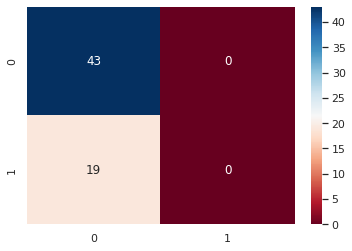

In [ ]:

c_matrix_1 = confusion_matrix(y_test,y_pred_test)
c_matrix_1
#Utilizing the heatmap function we have presented the confusion matrix.
sns.heatmap(c_matrix_1 , cmap='RdBu',annot=True)
plt.show()

In [ ]:
target_names = ['Present survived 5+ year','Present dead within 5 year']
print(classification_report(y_test, y_pred_test, target_names=target_names))

                            precision    recall  f1-score   support

  Present survived 5+ year       0.69      1.00      0.82        43
Present dead within 5 year       0.00      0.00      0.00        19

                  accuracy                           0.69        62
                 macro avg       0.35      0.50      0.41        62
              weighted avg       0.48      0.69      0.57        62



# **Gradient Boosting Algorithm**

In [ ]:
# import gradient boosting algorithm
from sklearn.datasets import make_hastie_10_2
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
gradi = GradientBoostingClassifier(n_estimators=5, learning_rate=3.0,
    max_depth=5, random_state=0)

y_pred = gradi.fit(X_train,y_train)

In [ ]:
y_pred_train = gradi.predict(X_train)
accuracy = accuracy_score(y_train,y_pred_train)
print('Accuracy for train data : ',accuracy)

y_pred_test = gradi.predict(X_test)
accuracy_7 = accuracy_score(y_test,y_pred_test)
print('Accuracy for test data : ',accuracy_7)

Accuracy for train data :  1.0
Accuracy for test data :  1.0


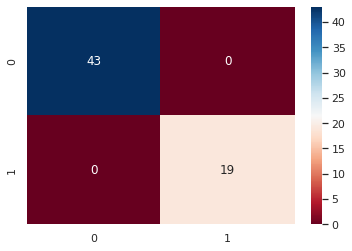

In [ ]:

c_matrix_1 = confusion_matrix(y_test, y_pred_test)

#Utilizing the heatmap function we have presented the confusion matrix.
sns.heatmap(c_matrix_1 , cmap='RdBu',annot=True)
plt.show()

In [ ]:
target_names = ['Present survived 5+ year','Present dead within 5 year']
print(classification_report(y_test, y_pred_test, target_names=target_names))

                            precision    recall  f1-score   support

  Present survived 5+ year       1.00      1.00      1.00        43
Present dead within 5 year       1.00      1.00      1.00        19

                  accuracy                           1.00        62
                 macro avg       1.00      1.00      1.00        62
              weighted avg       1.00      1.00      1.00        62



## **Comparison**

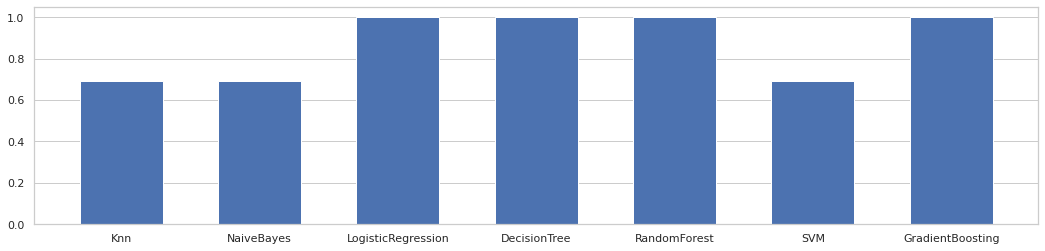

In [ ]:
#Lastly we have represented the optimal accuracy by comparing of all the algorithms applying the bar diagram

x = np.array(["Knn", "NaiveBayes", "LogisticRegression", "DecisionTree","RandomForest","SVM","GradientBoosting"])
y = np.array([accuracy_1, accuracy_2, accuracy_3,accuracy_4,accuracy_5,accuracy_6,accuracy_7])
plt.figure(figsize=(18,4))
plt.bar(x,y,width = 0.6)
plt.grid(axis = 'x')
plt.show()

<!-- From above all the results, we can see that the **kNeighborsClassifier(KNN)algorithm** has achieved **80.65% accuracy**,which is higher than the rest of the algorithms. Therefore, we can say that the **kNeighborsClassifier(KNN)  Algorithm** has better performance than others in the prediction of diabetics. -->